# **Table of Content**

### **1. Summary**
### **2. About Datasets**
### **3. Data Processing and Tranforming**
### **4. Data Analysis and Visualization**
### **5. Data Modelling**
### **6. Finding**

## **1.** **Introduction**

In this assignment, we will analyze Spotify data to determine the factors that contribute to a song's success. We will utilize Python programming, along with relevant Python libraries, to conduct our analysis. Through the use of charts and graphs, we aim to gain a deeper understanding of the dataset and identify key insights into what makes a song successful on Spotify.



## **2. About Dataset**

This dataset encompasses an extensive compilation of the top-rated songs featured on Spotify. It offers lots of attributes that surpass those commonly found in comparable datasets. data have 953 rows and 24 columns. Delving into each song's characteristics, popularity metrics, and distribution across multiple music platforms, it provides valuable insights.


1.  track_name: Name of the song
2.  artist(s)_name: Name of the artist in the songs
3.  artist_count: Number of artists contributing to the song
4.  released_year: Year when the song was released
5.  released_month: Month when the song was released    
6.  released_day: Day of the month when the song was released
7.  in_spotify_playlists: Number of Spotify playlists the song is included in
8.  in_spotify_charts: Presence and rank of the song on Spotify charts
9.  streams: Total number of streams on Spotify
10. in_apple_playlists: Number of Apple Music playlists the song is included in
11. in_apple_charts: Presence and rank of the song on Apple Music charts
12. in_deezer_playlists: Number of Deezer playlists the song is included in
13. in_deezer_charts: Presence and rank of the song on Deezer charts
14. in_shazam_charts: Presence and rank of the song on Shazam charts
15.  bpm: Beats per minute
16.  key: Key of the song
17.   mode: Mode of the song like major or minor
18.   danceability_%: Percentage indicating how suitable the song is for dancing
19.   valence_%: Positivity of the song's musical content
20.   energy_%: Perceived energy level of the song
21.   acousticness_%: Amount of acoustic sound in the songs
22.   instrumentalness_%: Amount of instrumental content in the song
23.   liveness_%: Presence of live performance elements
24.   speechiness_%: Amount of spoken words in the song




## **3. Data Processing and Tranforming**

In [1]:
# Mounting google drive on colab
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from pandas.api.types import CategoricalDtype
from scipy.stats import pearsonr
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
# loding dataset from drive
data = pd.read_csv("/content/drive/MyDrive/spotify-2023.csv", encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# size of dataset
data.shape

(953, 24)

In [ ]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists_name          953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    object
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  beat_per_minute       953 non-null    int64 
 15  key                   953 non-null    ob

**In our dataset, we have a variety of information about each song. This includes the basics like the song's title, the name of the artist or artists, and when it was released. But we also dive deeper into details like the song's key, beats per minute, and its overall vibe or personality. All of these factors come together to influence how many times a track is streamed.**

In [ ]:
# Cheking the null values
data.isnull().sum()

track_name               0
artists_name             0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
Beat_per_minute          0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**We can see that only two column have null values key and in_shazam_charts**

In [ ]:
# removing spaces from the dataset
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
# renaming the some columns name
data.rename(columns={'artist(s)_name': 'artists_name', 'bpm': 'Beat_per_minute'}, inplace=True)

In [ ]:
# Mapping of month name
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace released_month columns with their corresponding names
data['released_month'] = data['released_month'].map(month_names)


**Here I remaning the months cloumn from number to months name. It will going to helps us understands the data.**

In [ ]:
# Turning the artists column into list instead of a single string
artists_name = []

for row in data['artists_name']:
    item = row.split(',')
    artists_name.append(item)

data['artists_name'] = artists_name


In [ ]:
# Here we are going to flatten the nasted list for making the one list
artists_flattened = []
for item in artists_name:
    artists_flattened.extend(item)

**Creating the list of artists and flattening the nasted list, it will help us to do analysisand improve the accuracy.**

In [ ]:
data.head(5)

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,Beat_per_minute,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,July,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,[Myke Towers],1,2023,March,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,June,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[Taylor Swift],1,2019,August,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[Bad Bunny],1,2023,May,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# here we are going to convert the datatype from object to numeric
columns_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artists_name          953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    object 
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 14  Beat_per_minute       953 non-null    int64  
 15  key                   8

In [ ]:
print(data[columns_to_convert].isnull().sum())

streams                 1
in_deezer_playlists    79
in_shazam_charts       57
dtype: int64


After converting the datatype from object to numerical values, some values convert in null. so, we are going to use knn model for missing values imputation.

**About KNN:**
In KNN imputation, the missing values are replaced by the values of the nearest neighbors in the feature space. The algorithm calculates the distance between the missing value and all other data points with available values for the same features. Then, it selects the K nearest neighbors based on distance metrics such as Euclidean distance. Finally, the missing value is imputed with the average or weighted average of the values from the K nearest neighbors.


In [ ]:
# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Specify the columns containing missing values that need to be imputed
columns_to_impute = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Apply the KNN imputation to the selected columns in the dataset
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [ ]:
# Here we are going to fill null values in key with unknown
data['key'].fillna('Unknown', inplace=True)

**Key is the very important factore in a songs. Almost 10 % key values is missing. so we will replace the null values with unknown.**

In [ ]:
data.isnull().sum()

track_name              0
artists_name            0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
Beat_per_minute         0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

**Now that our data has been cleaned and all null values have been addressed, it is prepared for analysis.**

In [ ]:
# store cleaned data for futher analysis
data.to_csv('/content/drive/MyDrive/Cleaned_data', index=False)

## **4. Data Analysis & Visualizations**

In [3]:
# loading cleaned data from google drive
data = pd.read_csv("/content/drive/MyDrive/Cleaned_data")

In [4]:
data.head(5)

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,Beat_per_minute,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"['Latto', ' Jung Kook']",2,2023,July,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,['Myke Towers'],1,2023,March,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,['Olivia Rodrigo'],1,2023,June,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,['Taylor Swift'],1,2019,August,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,['Bad Bunny'],1,2023,May,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Find the minimum and maximum years in the 'released_year' column
min_year = data['released_year'].min()
max_year = data['released_year'].max()

# Calculate the number of years
num_years = max_year - min_year + 1  # Adding 1 to include the last year

print("Minimum Year:", min_year)
print("Maximum Year:", max_year)
print("Number of Years:", num_years)

Minimum Year: 1930
Maximum Year: 2023
Number of Years: 94


**The dataset spans 94 years, ranging from 1930 to 2023, capturing a wide historical range of data.**

In [ ]:
# Convert the list of artists into individual elements
all_artists = data['artists_name'].explode()

# Count the unique artists
unique_artists_count = all_artists.nunique()

print("Number of unique artists:", unique_artists_count)


Number of unique artists: 645


**The dataset contains a total of 645 unique artists.**

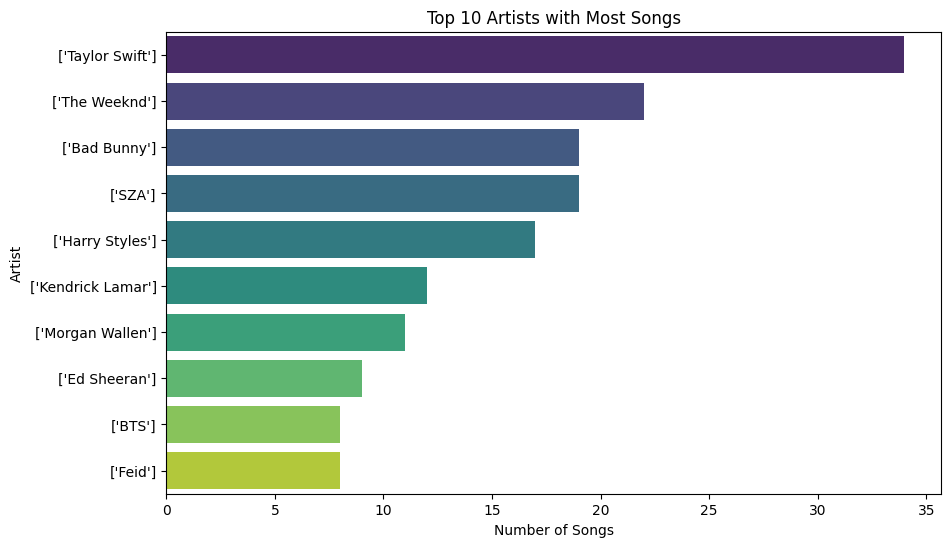

In [ ]:
# Count the occurrences of each artist
artist_counts = all_artists.value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.title('Top 10 Artists with Most Songs')
plt.show()

**In the charts, I've highlighted the top ten artists who have the most songs. Taylor Swift stands out at the top with an impressive 34 songs, while The Weeknd and Bad Bunny follow closely in second and third place, respectively.**

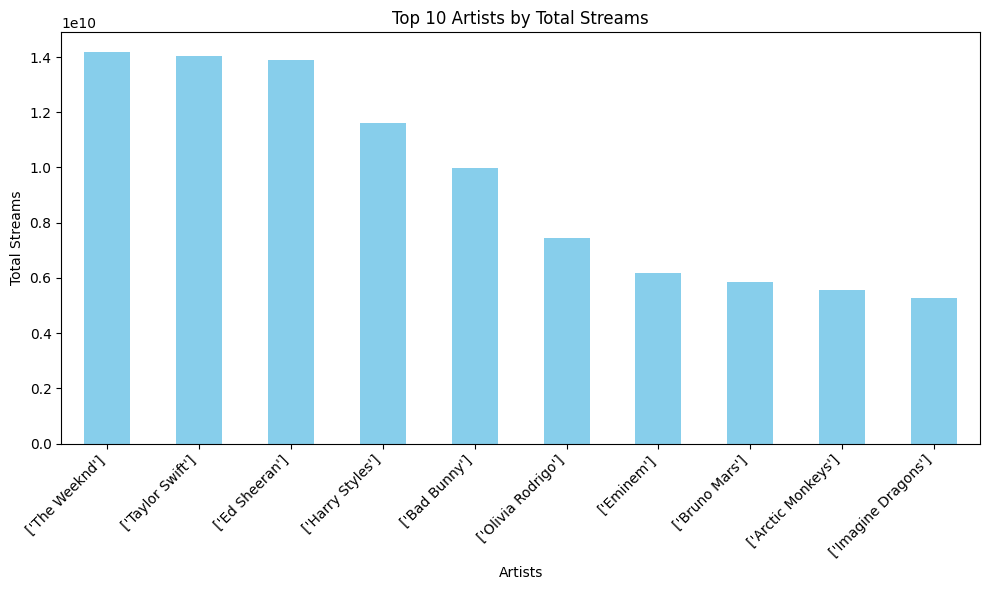

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by artists and summing the streams for each artist
artist_streams = data.groupby('artists_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 artists with the most streams
plt.figure(figsize=(10, 6))
artist_streams.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Artists')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**In the graph above, we observe the top 10 artists with the highest number of streams. Notably, the top 3 artists have nearly identical stream counts, indicating a close competition among them for the most popular tracks.**

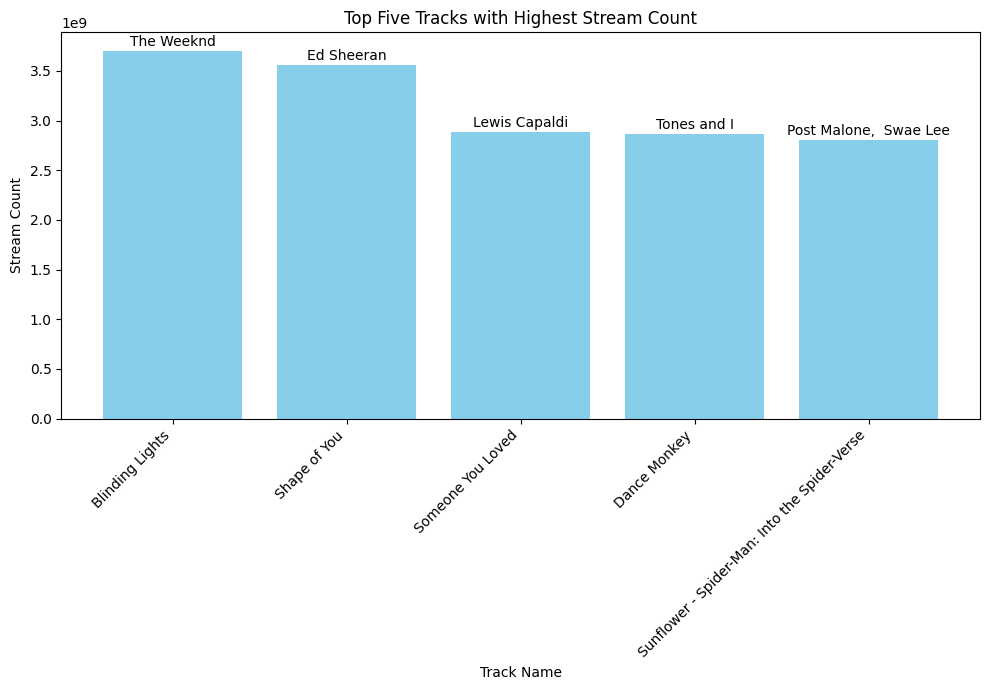

In [ ]:
import matplotlib.pyplot as plt

# Extracting top ten tracks with highest stream counts
top_ten_tracks = data.nlargest(5, 'streams')

# Plotting the graph
plt.figure(figsize=(10, 7))
plt.bar(top_ten_tracks['track_name'], top_ten_tracks['streams'], color='skyblue')

# Adding labels and title
plt.xlabel('Track Name')
plt.ylabel('Stream Count')
plt.title('Top Five Tracks with Highest Stream Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding artist names on top of each bar
for i, (track, streams) in enumerate(zip(top_ten_tracks['track_name'], top_ten_tracks['streams'])):
    artist_names = ', '.join(eval(data.loc[data['track_name'] == track, 'artists_name'].values[0]))
    plt.text(i, streams + 50000000, artist_names, ha='center')

# Displaying the plot
plt.tight_layout()
plt.show()

**In the presented graph, it's evident that The Weeknd's track 'Blinding Lights' has the highest number of streams. Interestingly, only two artists from the top 10 most-streamed artists have songs within the top 5 most popular songs.**

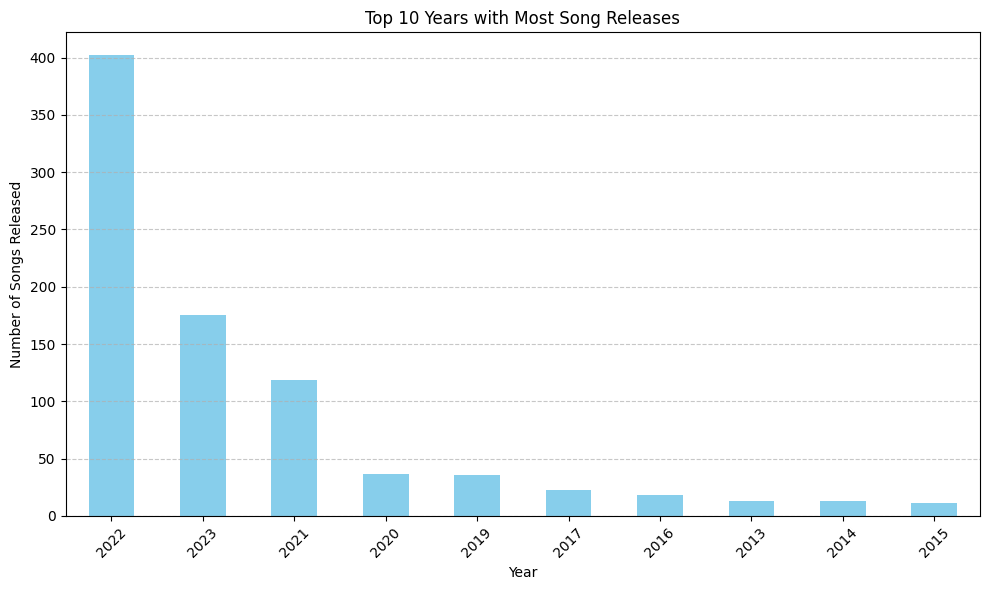

In [ ]:
year_counts = data['released_year'].value_counts().sort_index()

# Select the top 10 years with the most song releases
top_10_years = year_counts.nlargest(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar', color='skyblue')
plt.title('Top 10 Years with Most Song Releases')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**In the graph above, we observe a steady increase in the number of songs released over the years, except for 2023. This trend suggests that artists have been progressively releasing more songs over time.**

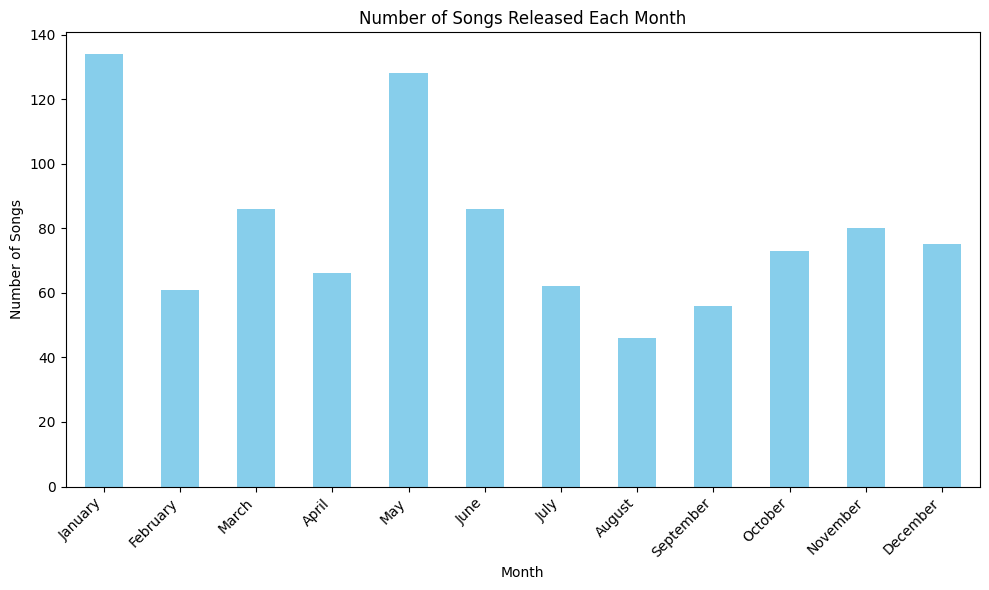

In [ ]:
# Convert 'released_month' column to categorical type to ensure correct ordering in the plot
data['released_month'] = pd.Categorical(data['released_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Group by month and count the number of songs released in each month
monthly_counts = data['released_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**In the graph above, we observe that the highest number of songs were released in January and May, while the lowest number of songs were released in August.**

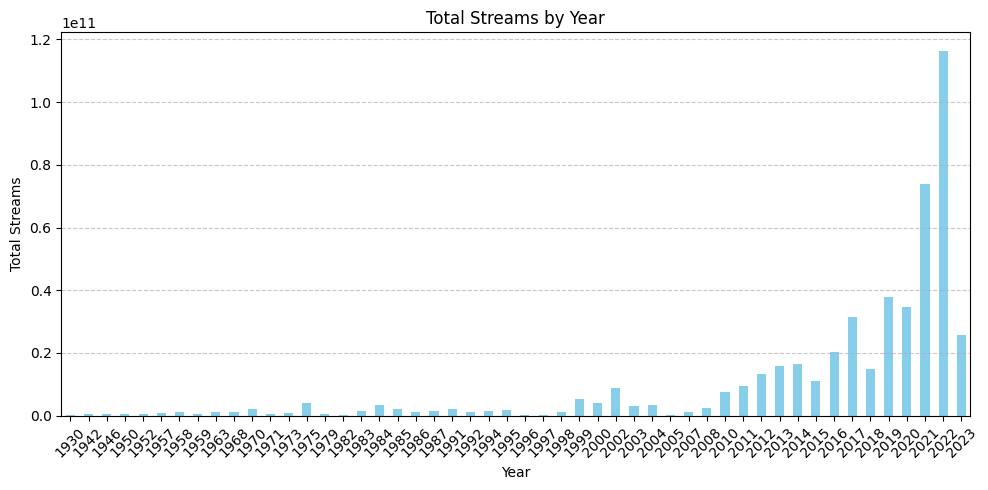

In [ ]:
# Group by released year and sum the streams
yearly_streams = data.groupby('released_year')['streams'].sum()

# Plotting
plt.figure(figsize=(10, 5))
yearly_streams.plot(kind='bar', color='skyblue')
plt.title('Total Streams by Year')
plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**In the graph above, we observe a general trend of increasing song listens over time. However, it appears that there might be some missing data for the year 2023, as indicated by a potential drop in total streams. Nonetheless, the overall trend suggests that people are dedicating more time to listening to songs as time progresses.**

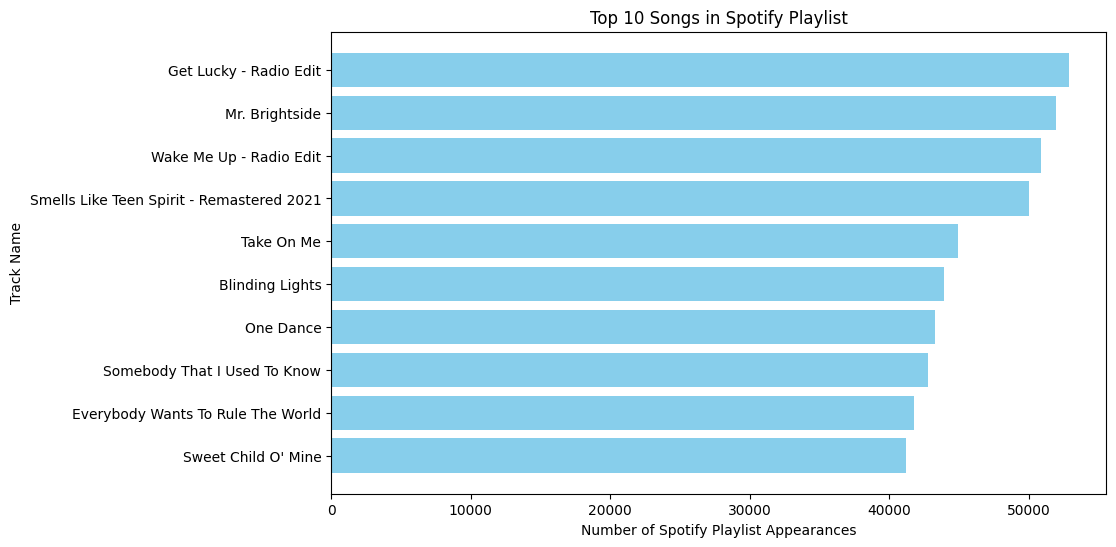

In [ ]:
# Sort the DataFrame by 'in_spotify_charts' in descending order and select the top 10 rows
top_10_spotify_songs = data.sort_values(by='in_spotify_playlists', ascending=False).head(10)

# Create a bar plot of the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_10_spotify_songs['track_name'], top_10_spotify_songs['in_spotify_playlists'], color='skyblue')
plt.xlabel('Number of Spotify Playlist Appearances')
plt.ylabel('Track Name')
plt.title('Top 10 Songs in Spotify Playlist')
plt.gca().invert_yaxis()  # Invert y-axis to have the top song at the top
plt.show()

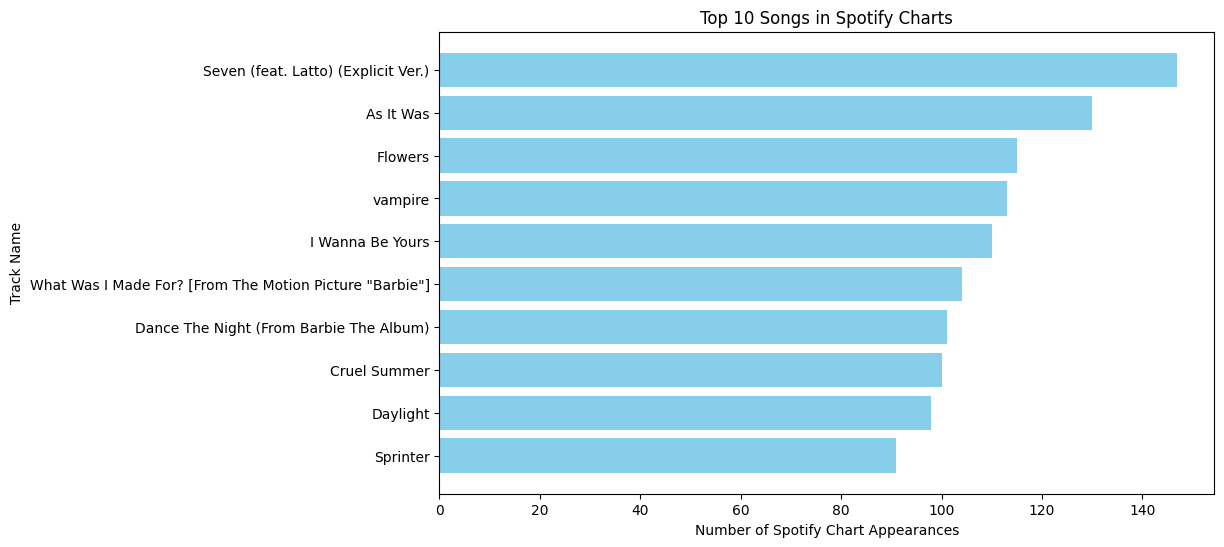

In [ ]:
# Sort the DataFrame by 'in_spotify_charts' in descending order and select the top 10 rows
top_10_spotify_songs = data.sort_values(by='in_spotify_charts', ascending=False).head(10)

# Create a bar plot of the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_10_spotify_songs['track_name'], top_10_spotify_songs['in_spotify_charts'], color='skyblue')
plt.xlabel('Number of Spotify Chart Appearances')
plt.ylabel('Track Name')
plt.title('Top 10 Songs in Spotify Charts')
plt.gca().invert_yaxis()  # Invert y-axis to have the top song at the top
plt.show()

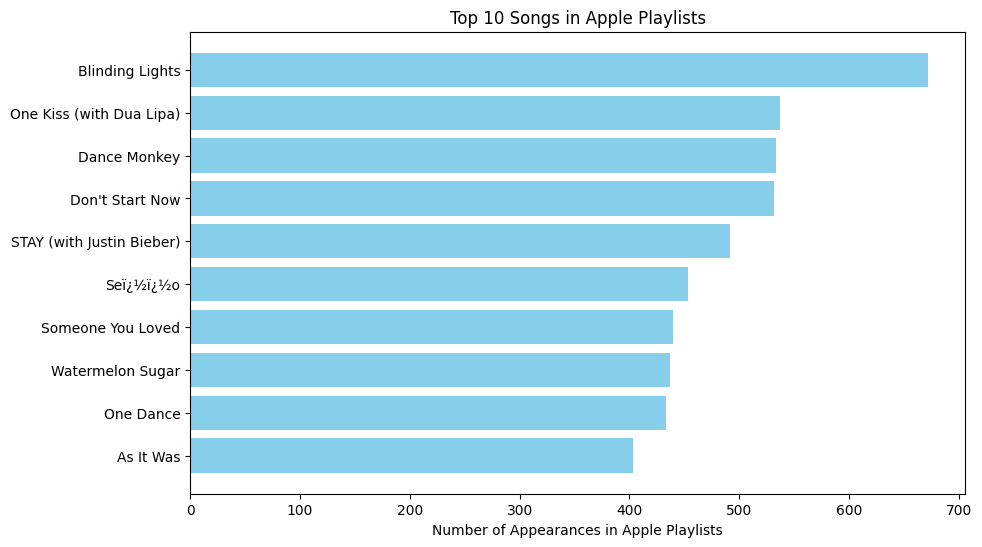

In [ ]:
# Sort the DataFrame based on the 'in_apple_playlists' column in descending order
top_10_songs = data.sort_values(by='in_apple_playlists', ascending=False).head(10)

# Plot the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['in_apple_playlists'], color='skyblue')
plt.xlabel('Number of Appearances in Apple Playlists')
plt.title('Top 10 Songs in Apple Playlists')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of appearances at the top
plt.show()

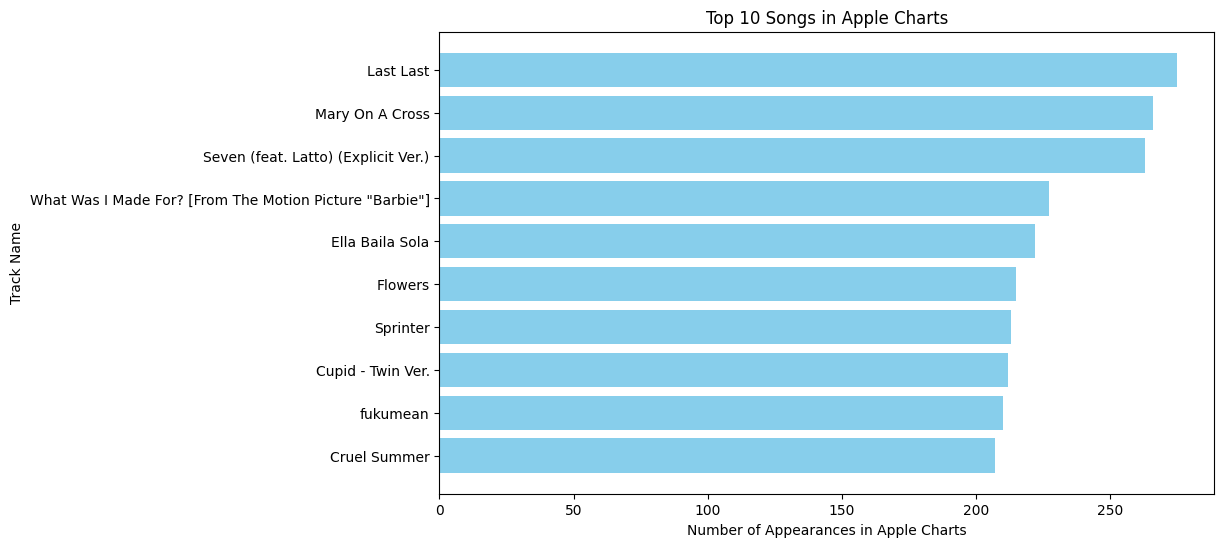

In [ ]:
# Sort the DataFrame based on the 'in_apple_charts' column in descending order
top_songs = data.sort_values(by='in_apple_charts', ascending=False).head(10)

# Plotting the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_songs['track_name'], top_songs['in_apple_charts'], color='skyblue')
plt.xlabel('Number of Appearances in Apple Charts')
plt.ylabel('Track Name')
plt.title('Top 10 Songs in Apple Charts')
plt.gca().invert_yaxis()  # Invert y-axis to show the song with the highest appearances at the top
plt.show()

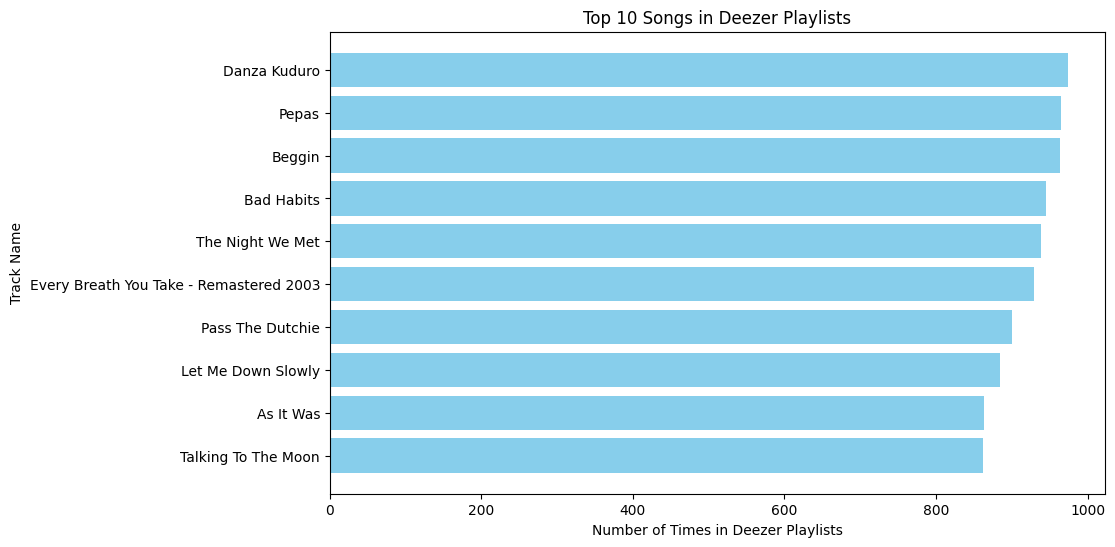

In [ ]:
# Sort the DataFrame by the 'in_deezer_playlists' column in descending order and select the top 10 rows
top_songs = data.sort_values(by='in_deezer_playlists', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_songs['track_name'], top_songs['in_deezer_playlists'], color='skyblue')
plt.xlabel('Number of Times in Deezer Playlists')
plt.ylabel('Track Name')
plt.title('Top 10 Songs in Deezer Playlists')
plt.gca().invert_yaxis()  # Invert y-axis to display the song with the most playlists at the top
plt.show()

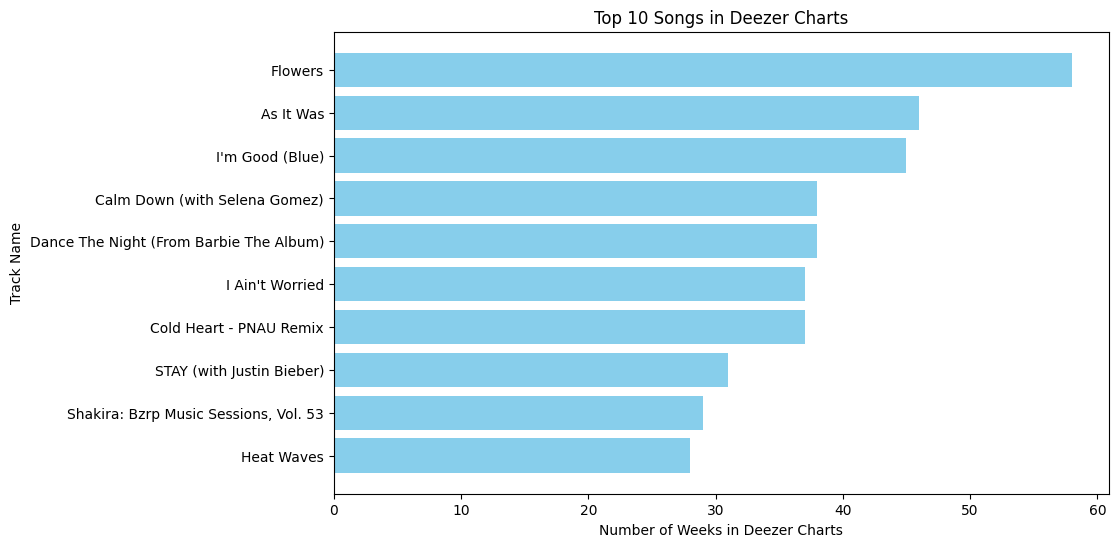

In [ ]:
top_10_deezer_songs = data.nlargest(10, 'in_deezer_charts')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_deezer_songs['track_name'], top_10_deezer_songs['in_deezer_charts'], color='skyblue')
plt.xlabel('Number of Weeks in Deezer Charts')
plt.ylabel('Track Name')
plt.title('Top 10 Songs in Deezer Charts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rank at the top
plt.show()

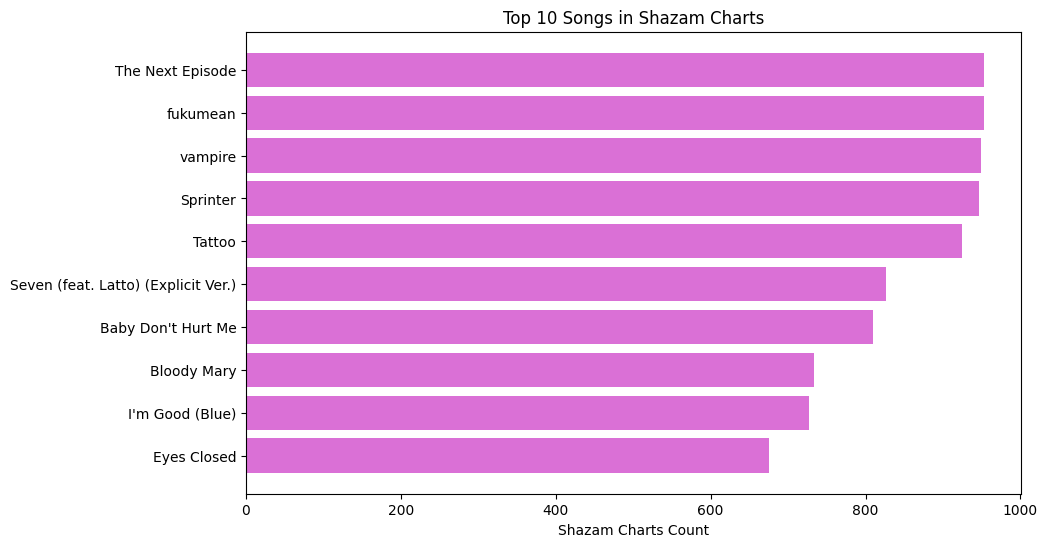

In [ ]:
top_10_songs = data.sort_values(by='in_shazam_charts', ascending=False).head(10)

# Plotting the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['in_shazam_charts'], color = 'orchid')
plt.xlabel('Shazam Charts Count')
plt.title('Top 10 Songs in Shazam Charts')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

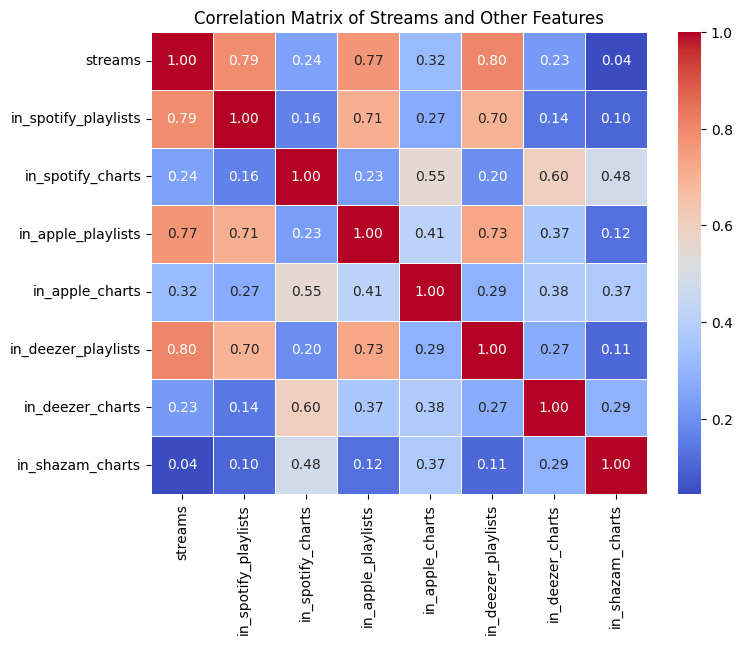

In [ ]:
columns_of_interest = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Creating a correlation matrix
correlation_matrix = data[columns_of_interest].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Streams and Other Features')
plt.show()

**After analyzing the eight graphs above, it's evident that songs popular on Spotify Playlist, Apple Playlist, and Deezer playlists tend to accumulate the highest number of streams.**
**The correlation analysis highlights a strong positive
relationship between streams, Spotify playlists, Apple Music playlists, and Deezer playlists**





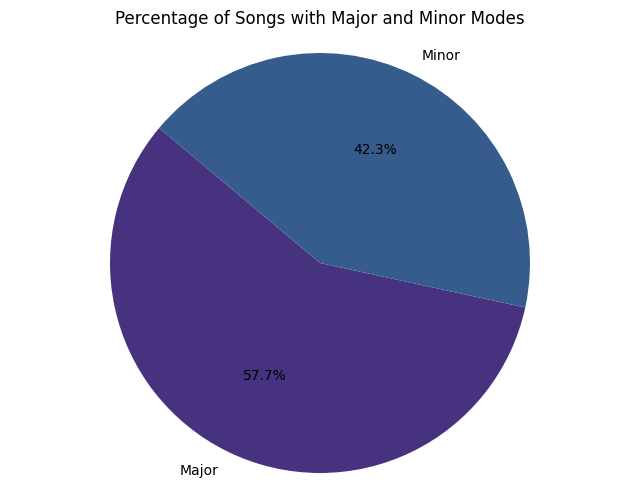

In [ ]:
# Calculate percentages
mode_counts = data['mode'].value_counts()
mode_percentages = (mode_counts / mode_counts.sum()) * 100

# Plot
plt.figure(figsize=(8, 6))
plt.pie(mode_percentages, labels=mode_percentages.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Percentage of Songs with Major and Minor Modes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


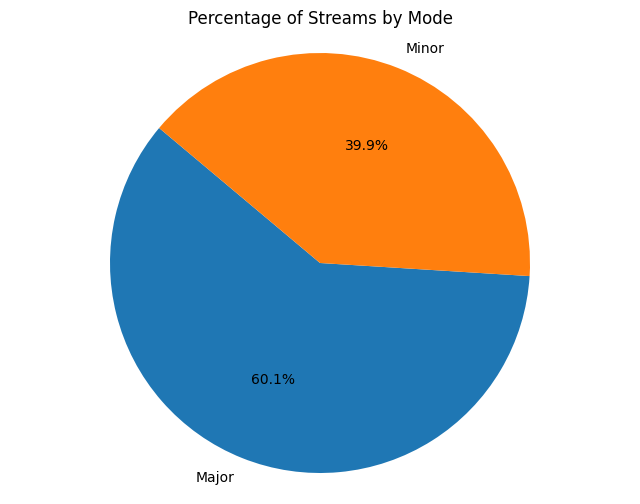

In [6]:
# Grouping the data by mode and summing the streams
mode_streams = data.groupby('mode')['streams'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(mode_streams, labels=mode_streams.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Streams by Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**The pie chart illustrates a clear preference for songs in the Major mode over those in the Minor mode, based on the percentage of streams attributed to each mode. Major mode songs dominate the streaming landscape, indicating a stronger appeal among listeners compared to Minor mode songs.**

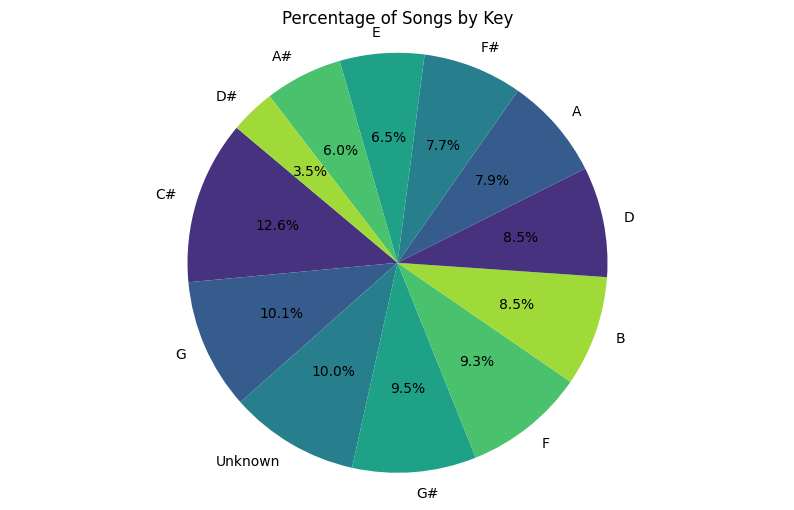

In [ ]:
# Calculate percentages
key_counts = data['key'].value_counts()
key_percentages = (key_counts/ key_counts.sum()) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.pie(key_percentages, labels=key_percentages.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Percentage of Songs by Key')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


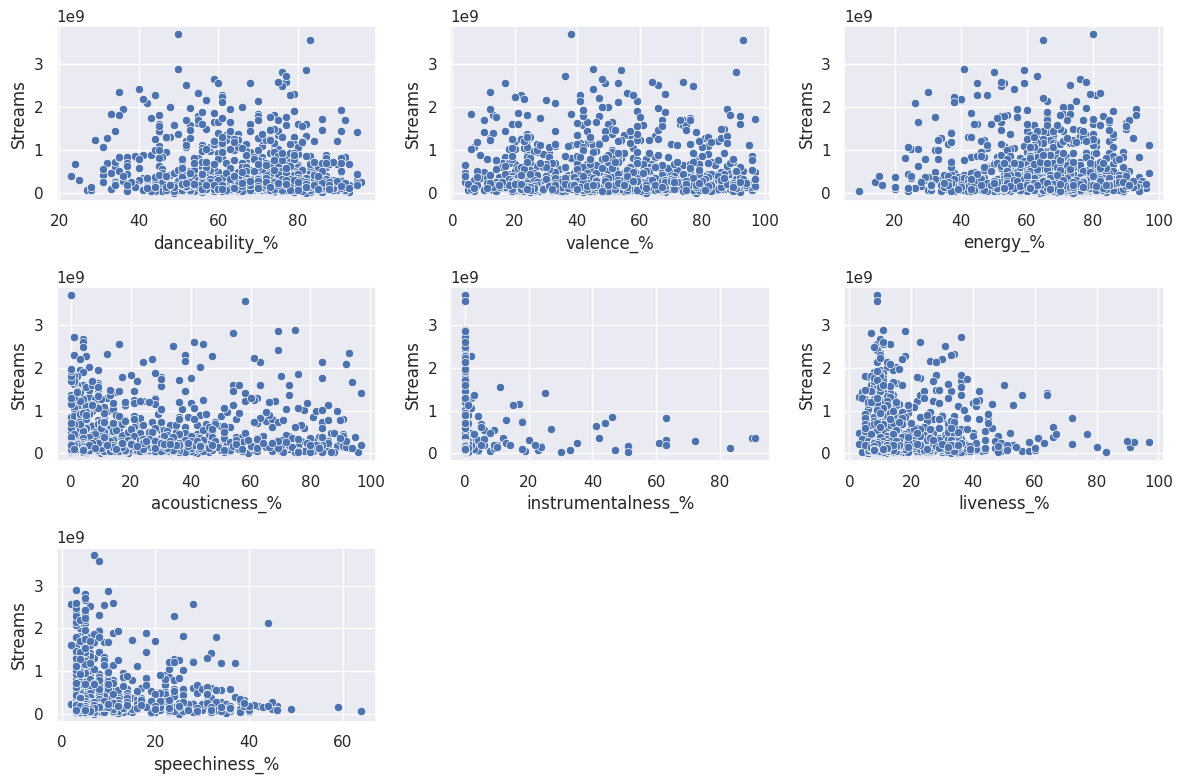

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to be plotted
columns_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each column and create a scatter plot against 'streams'
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=column, y='streams')
    plt.xlabel(column)
    plt.ylabel('Streams')

plt.tight_layout()
plt.show()


1. There are no songs on the list that are less than 20% danceable.
2. Valence is a mixed bag with a balanced distribution.
3. when Energy is less than 20% then stream is very low
4. Most songs are 0 in the instrumentalness characteristic. This means most of the songs have vocals in it.
5. Most top songs are not live in nature. Meaning that they are more likely to be recorded in a studio rather than in a live audience.
6. Speechiness may look similar to instrumentalness, but are more spread out. This means that while most songs have vocals, not all of them include actual words.



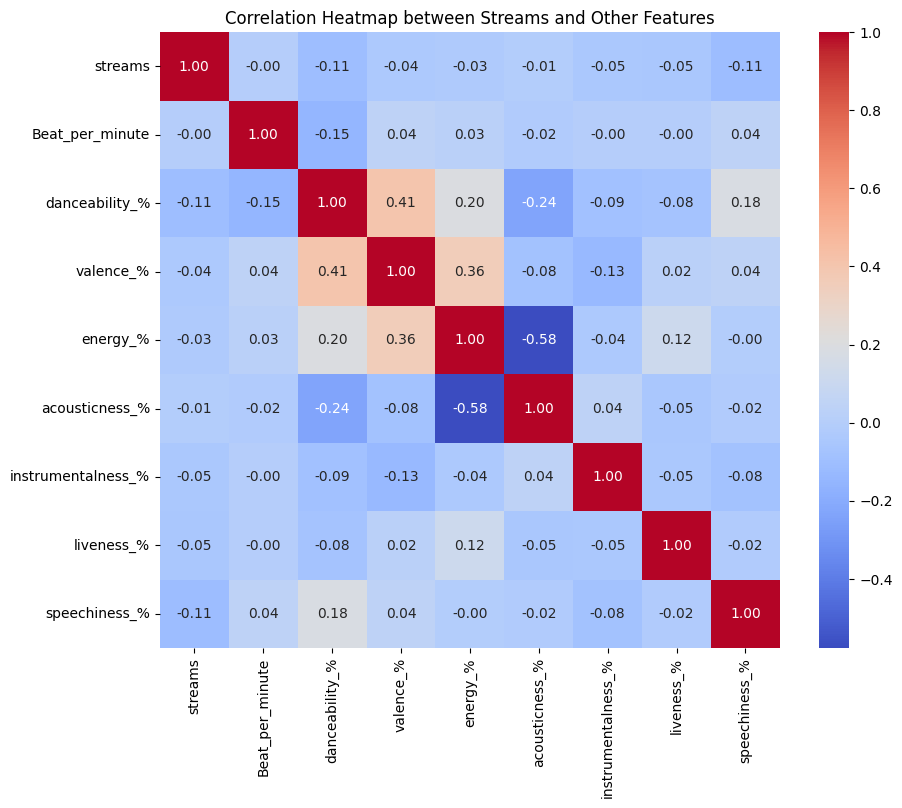

In [ ]:
# Select the columns for correlation analysis
columns_to_correlate = ['streams', 'Beat_per_minute', 'danceability_%', 'valence_%', 'energy_%',
                        'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Compute the correlation matrix
correlation_matrix = data[columns_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Streams and Other Features')
plt.show()

**After analysing the heatmap i found that energy and acousticness have negetive relation.**
**Danceability and valence have positive relation.**


## **5. Data Modeling**

In [ ]:
#  droping stream from data
X = data.drop('streams', axis=1)
y = data['streams']

In [ ]:
# encoding dataset for machine learning model
X_encoded = pd.get_dummies(X)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X_encoded)

# Transform the data
scaled_data = scaler.transform(X_encoded)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X_encoded.columns)


In [ ]:
# creating X_train, X_test, y_train, y_test data in 80- 20% ratio
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)


### **1. DecisionTreeRegressor Model**

In [ ]:
# Create a decision tree regression model
tree_model = DecisionTreeRegressor()  # You can adjust the max_depth hyperparameter

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a DecisionTreeRegressor model with the best hyperparameters
best_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'])


# Fit the model to the training data
best_tree_model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = best_tree_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.9337410645462504e+16


In [ ]:
feature_importances = best_tree_model.feature_importances_

# Assuming you have already calculated the feature importances
importance_features = list(zip(X.columns, feature_importances))

# Sorting the list in descending order of feature importances
importance_features_sorted = sorted(importance_features, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_features_sorted:
    print(f"{feature}: {importance}")

in_spotify_charts: 0.6736108275652539
released_year: 0.21908981086259252
artists_name: 0.05026185622543182
released_day: 0.022339395131285706
in_apple_charts: 0.008877645253798127
key: 0.006998489459022655
danceability_%: 0.0045099954168329
released_month: 0.003983049463696239
in_spotify_playlists: 0.0032155194567086323
in_deezer_playlists: 0.0010116009194292618
track_name: 0.0
artist_count: 0.0
in_apple_playlists: 0.0
in_deezer_charts: 0.0
in_shazam_charts: 0.0
Beat_per_minute: 0.0
mode: 0.0
valence_%: 0.0
energy_%: 0.0
acousticness_%: 0.0
instrumentalness_%: 0.0
liveness_%: 0.0
speechiness_%: 0.0


#### **Observation**

1. **In this analysis, we employed a Decision Tree Regression model to determine the most influential factors contributing to a song's success.**
2. **Utilizing GridSearchCV for hyperparameter tuning, we identified optimal parameters, resulting in a Mean Square Error of 6.93.**
3. **Our model highlights in_spotify_chart presence, artist name, and release year as the most significant factors influencing a song's success.**

### **2. Lasso Model**

In [ ]:
from sklearn.linear_model import Lasso

# Create a lasso regression model
lasso_model = Lasso() # You can adjust the alpha hyperparameter

param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_encoded, y_train)

best_params = grid_search.best_params_
best_lasso = Lasso(alpha=best_params['alpha'])

# Fit the model to the training data
best_lasso.fit(X_train_encoded, y_train)

y_pred = best_lasso.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1822726546823382e+17


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract coefficients and feature names
coefficients = best_lasso.coef_
feature_names = X.columns

# Combine feature names and coefficients using zip
importance_feature = list(zip(feature_names, coefficients))

# Sort the list in descending order of absolute coefficients
importance_feature_sorted = sorted(importance_feature, key=lambda x: abs(x[1]), reverse=True)

# Extract coefficients
coefficients = [abs(coefficient) for _, coefficient in importance_feature_sorted]

# Rescale coefficients using MinMaxScaler
scaler = MinMaxScaler()
coefficients_scaled = scaler.fit_transform(np.array(coefficients).reshape(-1, 1))

# Print the sorted feature coefficients
for (feature, _), coefficient_scaled in zip(importance_feature_sorted, coefficients_scaled):
    print(f"{feature}: {coefficient_scaled[0]}")


released_year: 1.0
artists_name: 0.3498448609114154
released_month: 0.23910567693982782
track_name: 0.1993795728355097
released_day: 0.17927515600729763
in_spotify_charts: 0.17212467511271923
in_apple_charts: 0.13106709100054556
in_apple_playlists: 0.10937150611309457
in_spotify_playlists: 0.10242482643713262
artist_count: 0.09735092900366892
in_deezer_charts: 0.09346530154133531
in_shazam_charts: 0.05035617057913074
mode: 0.04774881070647303
speechiness_%: 0.03258553612415511
acousticness_%: 0.03188039574955828
in_deezer_playlists: 0.025653790170937003
danceability_%: 0.021608643110356585
instrumentalness_%: 0.00876701567010407
liveness_%: 0.003612238058491301
key: 0.003191714369609599
energy_%: 0.0008747220288104651
Beat_per_minute: 0.0006033025665727667
valence_%: 0.0


#### **Observation**

1. **In this analysis, we employed a lasso model to determine the most influential factors contributing to a song's success.**
2. **Utilizing GridSearchCV for hyperparameter tuning, we identified optimal parameters, resulting in a Mean Square Error of 1.27**
3. **Our model highlights released year, artist name, and release month as the most significant factors influencing a song's success.**

#### **Gradient Boosting Regressor**

In [ ]:
# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Gradient Boosting Regressor model with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

# Fit the best model to the training data
best_gb_regressor.fit(X_train_encoded, y_train)

# Make predictions on the test data using the best model
y_pred_best = best_gb_regressor.predict(X_test_encoded)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best}")

Best Model Mean Squared Error: 4.105930636322147e+16


In [ ]:
feature_importances = best_gb_regressor.feature_importances_

# Assuming you have already calculated the feature importances
importance_features = list(zip(X.columns, feature_importances))

# Sort the list in descending order of feature importances
importance_features_sorted = sorted(importance_features, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_features_sorted:
    print(f"{feature}: {importance}")

in_spotify_charts: 0.42797620606892917
released_year: 0.38329125180597623
artists_name: 0.056491116986895774
released_day: 0.02899794879320908
released_month: 0.013645914833544935
in_apple_charts: 0.0068755317195174585
in_deezer_playlists: 0.006807762904995289
in_spotify_playlists: 0.004598283624806463
key: 0.004117660584690638
in_deezer_charts: 0.004021038439448501
mode: 0.0038638602680183495
danceability_%: 0.0026502762898033628
Beat_per_minute: 0.0016083513649961779
artist_count: 0.0012554990852259695
in_shazam_charts: 0.0006542939575794775
track_name: 0.0005805438164086787
in_apple_playlists: 0.0004901490689731728
valence_%: 0.00044293776848970624
speechiness_%: 0.00014833442122886068
energy_%: 2.9808180081955315e-05
liveness_%: 1.9631136732509127e-05
acousticness_%: 0.0
instrumentalness_%: 0.0


#### **Observation**

1. **In this analysis, we employed a Gradient Boosting Regressor to determine the most influential factors contributing to a song's success.**
2. **Utilizing GridSearchCV for hyperparameter tuning, we identified optimal parameters, resulting in a Mean Square Error of 1.27**
3. **Our model highlights in_spotify_chart, released year, artist name, and release day as the most significant factors influencing a song's success.**

## **Tableau DashBoard**

In [7]:
%%html
<div class='tableauPlaceholder' id='viz1708286006087' style='position: relative'><noscript><a href='#'><img alt='Spotify Song Data Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sp&#47;Spotify_data_analysis_17071594342710&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Spotify_data_analysis_17071594342710&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sp&#47;Spotify_data_analysis_17071594342710&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1708286006087');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1580px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='927px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1580px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='927px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='2077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## **Finding**



1. The dataset spans 94 years, ranging from 1930 to 2023, capturing a wide historical range of data.
2. The dataset contains a total of 645 unique artists.
3. Out of the top 10 artists with the most songs, only two are female singers (Taylor Swift and SZA), while the remaining eight are male.
4. Among the top 10 most popular songs, only 2 are by female artists, and one belongs to a rock band and another to a pop band.
5. The Blinding Lights" stands out as the most streamed song in the dataset, reflecting its popularity. Over time, artists have been releasing more songs, coinciding with an increase in people's listening habits.
6. Most songs are released in January and May.
After analyzing the data, I noticed that users' behavior on Spotify, Apple Music, and Deezer is remarkably alike. They tend to choose similar songs across these platforms.
7. About 57.7% of songs have a major mood, while 42.3% are in a minor key. The most common key is C#, followed by G..
8. All songs are danceable to some extent, with different emotional tones. Lower energy songs tend to have fewer streams
9. Most songs have vocals, and top songs are typically studio recordings. Vocal presence varies in terms of actual words.
10. The success of a song largely hinges on its presence on Spotify charts, the artist's name, the year of release, and the track's title.